### Assignment1

Remember -> submission using itslearning, both notebook and github repo *deadline on 22.11.2021*

#### Task 1 (3 points):

Regression $\to$ Superconductivity Data Set

The goal here is to predict the critical temperature based on the features extracted.

https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data

* Fit two regression models to predict the critical temperature. Report the score with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained score as a function of the chosen parameter. Plot the coefficient magnitudes for the best model. 

In [2]:
# Import libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix

plt.rcParams["figure.figsize"] = [16, 9]

In [3]:
# Load dataset
url = "https://people.arcada.fi/~martinel/"
df = pd.read_csv(url + 'train.csv')

# Separate dependent and independent variables
X = df.drop('critical_temp',axis=1)
y = df['critical_temp']

# Print shape
print(df.shape)

(21263, 82)


In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Fit two regression models to predict the critical temperature. Report the score with the default parameters of each model
ridge_reg = Ridge().fit(X_train, y_train)    
lasso_reg = Lasso().fit(X_train, y_train)

print("Ridge regression:")
print("Training set score: {:.2f}".format(ridge_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge_reg.score(X_test, y_test)))
print("Number of features used: {}\n".format(np.sum(ridge_reg.coef_ != 0)))

print("Lasso regression:")
print("Training set score: {:.2f}".format(lasso_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso_reg.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso_reg.coef_ != 0)))

Ridge regression:
Training set score: 0.74
Test set score: 0.73
Number of features used: 81

Lasso regression:
Training set score: 0.66
Test set score: 0.65
Number of features used: 17


In [28]:
# Perform a simple manual optimization for one of the default parameters (at least 5 different values) 
alphas = [0.001,0.01,0.1,1,10]
models = ["Ridge Train", "Ridge Test", "Lasso Train", "Lasso Test"]

ridge_reg_test_scores = []
lasso_reg_test_scores = []

r2_dataset = pd.DataFrame()
r2_dataset["Model"] = models

for alpha in alphas:
    
    ridge_reg = Ridge(alpha=alpha).fit(X_train, y_train)    
    lasso_reg = Lasso(alpha=alpha).fit(X_train, y_train)

    ridge_reg_test_scores.append(ridge_reg.score(X_test, y_test))
    lasso_reg_test_scores.append(lasso_reg.score(X_test, y_test))
    
    r2_dataset[f"alpha={alpha}"] = [
        ridge_reg.score(X_train, y_train),
        ridge_reg.score(X_test, y_test),      
        lasso_reg.score(X_train, y_train), 
        lasso_reg.score(X_test, y_test) 
                            ]

r2_dataset

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2103871.1868630974, tolerance: 1754.3573232153894
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1130237.3413717858, tolerance: 1754.3573232153894
  model = cd_fast.enet_coordinate_descent(


,Model,alpha=0.001,alpha=0.01,alpha=0.1,alpha=1,alpha=10
0,Ridge Train,0.740408,0.740407,0.740400,0.740122,0.738072
1,Ridge Test,0.728143,0.728134,0.728047,0.727459,0.725678
2,Lasso Train,0.738412,0.736743,0.714140,0.655507,0.462365
3,Lasso Test,0.725511,0.724710,0.700977,0.646351,0.460409


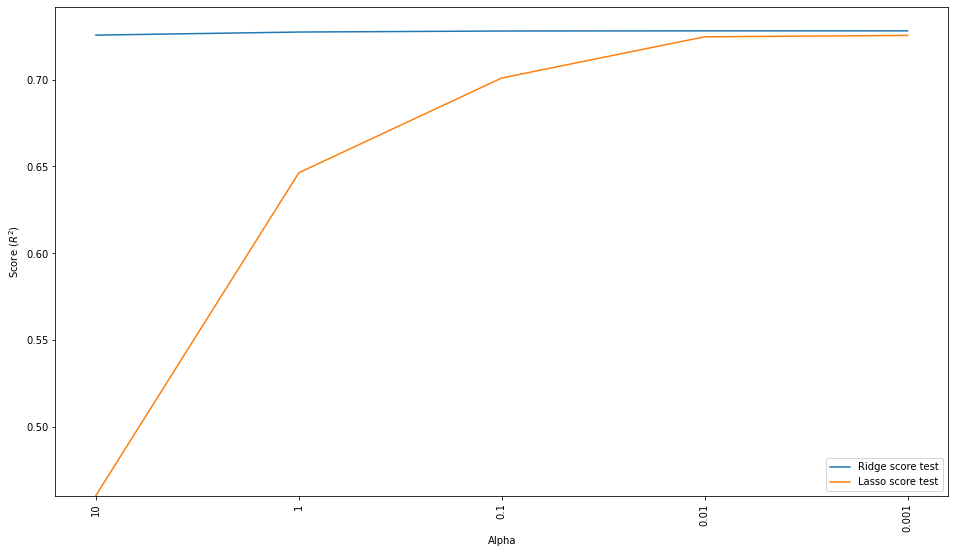

In [30]:
# Plot the new obtained score as a function of the chosen parameter
def plot_score():    
    plt.plot(ridge_reg_test_scores, label="Ridge score test")
    plt.plot(lasso_reg_test_scores, label="Lasso score test")
    plt.ylabel("Score ($R^2$)")
    plt.xlabel("Alpha")
    plt.ylim([0.46,0.742])
    plt.xticks(range(len(alphas)), alphas, rotation=90)
    plt.gca().invert_xaxis()
    plt.legend()

plot_score()

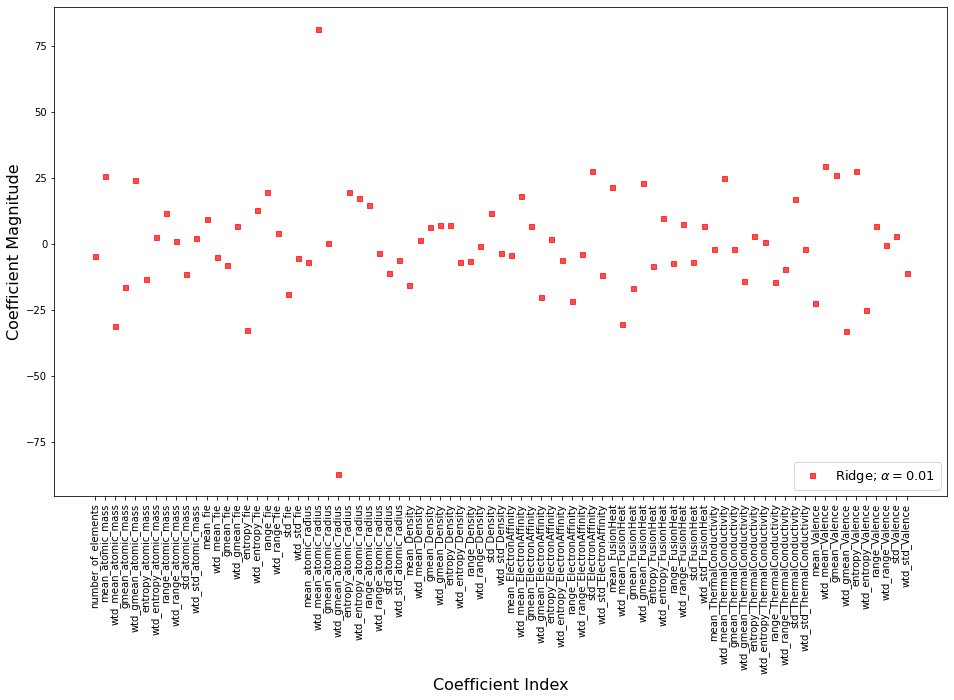

In [31]:
# Plot the coefficient magnitudes for the best model (Ridge - alpha 0.01)
ridge_reg = Ridge(alpha=0.01).fit(X_train, y_train)    

names = list(X.columns)
plt.plot(ridge_reg.coef_,alpha=0.7,linestyle='none',marker='s',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.xticks(range(len(names)), names, rotation=90)
plt.legend(fontsize=13,loc=4)
plt.show()

#### Task 2 (3 points):

Binary classification $\to$ Default of credit card clients Data Set

The goal here is to predict the default payment next month.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

* Fit two binary classification models to predict the client's credit card default. Report accuracy with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained accuracy as a function of the chosen parameter.. Plot the feature importance. 

In [32]:
# Load dataset
url = "https://people.arcada.fi/~martinel/"
df = pd.read_excel(url + 'default_of_credit_card_clients.xls', sheet_name='Data', header=1)

In [33]:
# Rename Target column
df = df.rename(columns={'default payment next month': 'Target'})

# Dropping features
df.drop(columns=['ID'], inplace=True)

# Convert columns from one data type to another
df["SEX"] = df["SEX"].astype('category')
df["EDUCATION"] = df["EDUCATION"].astype('category')
df["MARRIAGE"] = df["MARRIAGE"].astype('category')

# Separate dependent and independent variables
X = df.drop('Target',axis=1)
y = df['Target']

In [34]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Fit a Logistic Regression Model with train data
log_reg = LogisticRegression().fit(X_train, y_train)
lin_svc = LinearSVC().fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [36]:
# Make predictions on the testing data
log_reg_pred = log_reg.predict(X_test)
lin_svc_pred = lin_svc.predict(X_test)

In [37]:
def print_results(TN, FP, FN, TP):
    print('True Positive(TP)  = ', TP)
    print('False Positive(FP) = ', FP)
    print('True Negative(TN)  = ', TN)
    print('False Negative(FN) = ', FN)
    accuracy =  (TP+TN) /(TP+FP+TN+FN)
    print('Accuracy of the binary classification = {:0.3f}\n'.format(accuracy))

# Logistic Regression
cm = confusion_matrix(y_test, log_reg_pred)
TN, FP, FN, TP = confusion_matrix(y_test, log_reg_pred).ravel()
print("Logistic Regression:")
print_results(TN, FP, FN, TP)

# LinearSVC
print("Linear SVM:")
cm = confusion_matrix(y_test, lin_svc_pred)
TN, FP, FN, TP = confusion_matrix(y_test, lin_svc_pred).ravel()
print_results(TN, FP, FN, TP)

Logistic Regression:
True Positive(TP)  =  455
False Positive(FP) =  216
True Negative(TN)  =  6824
False Negative(FN) =  1505
Accuracy of the binary classification = 0.809

Linear SVM:
True Positive(TP)  =  330
False Positive(FP) =  152
True Negative(TN)  =  6888
False Negative(FN) =  1630
Accuracy of the binary classification = 0.802



In [39]:
# Perform a simple manual optimization for one of the default parameters (at least 5 different values) 
C_param_range = [0.001,0.01,0.1,1,10,100]
models = ["Logistic Regression Train", "Logistic Regression Test", "Linear SVC Train", "Linear SVC Test"]

r2_dataset = pd.DataFrame()
r2_dataset["Model"] = models

log_reg_test_scores = []
lin_svc_test_scores = []

for C_param in C_param_range:
    
    log_reg = LogisticRegression(C=C_param).fit(X_train, y_train)    
    lin_svc = LinearSVC(C=C_param).fit(X_train, y_train)

    log_reg_test_scores.append(log_reg.score(X_test, y_test))
    lin_svc_test_scores.append(lin_svc.score(X_test, y_test))

    r2_dataset[f"C={C_param}"] = [
        log_reg.score(X_train, y_train),
        log_reg.score(X_test, y_test),      
        lin_svc.score(X_train, y_train), 
        lin_svc.score(X_test, y_test) 
                            ]

r2_dataset

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,Model,C=0.001,C=0.01,C=0.1,C=1,C=10,C=100
0,Logistic Regression Train,0.802571,0.809429,0.811429,0.811524,0.811524,0.811524
1,Logistic Regression Test,0.801222,0.808556,0.808889,0.808778,0.808778,0.808778
2,Linear SVC Train,0.803143,0.803286,0.803381,0.803429,0.810238,0.755429
3,Linear SVC Test,0.801889,0.801444,0.801556,0.801889,0.805667,0.752667


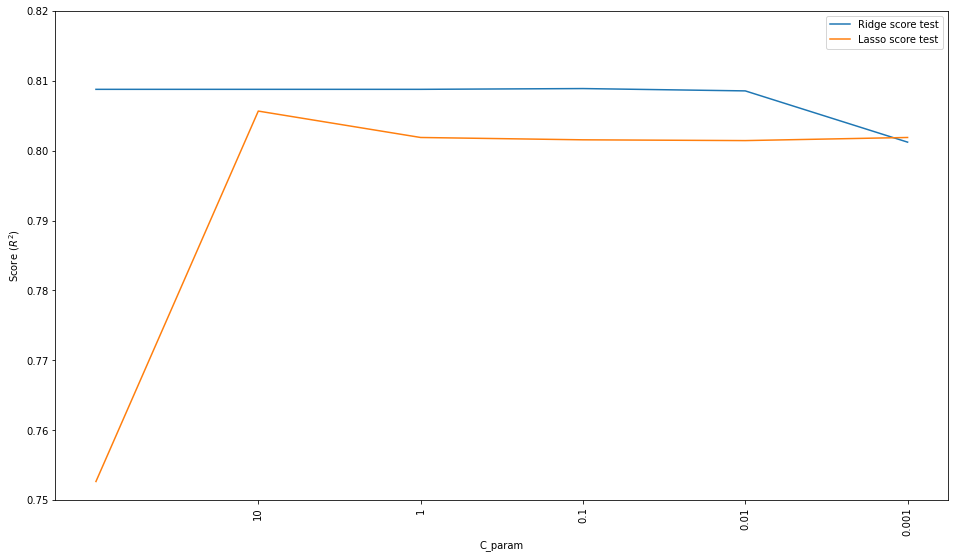

In [41]:
# Plot the new obtained score as a function of the chosen parameter
def plot_score():    
    plt.plot(log_reg_test_scores, label="Ridge score test")
    plt.plot(lin_svc_test_scores, label="Lasso score test")
    plt.ylabel("Score ($R^2$)")
    plt.xlabel("C_param")
    plt.ylim([0.75,0.82])
    plt.xticks(range(len(alphas)), alphas, rotation=90)
    plt.gca().invert_xaxis()
    plt.legend()

plot_score()

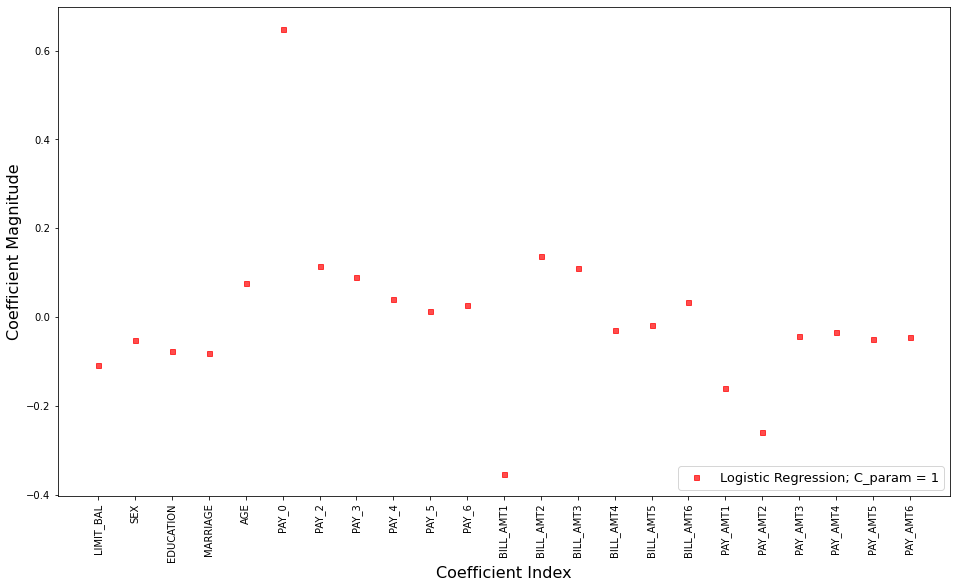

In [43]:
# Plot the coefficient magnitudes for the best model (Logisctic Regression - C 0.1)
log_reg = LogisticRegression(C=0.1).fit(X_train, y_train)    

names = list(df.drop('Target',axis=1).columns)
plt.plot(log_reg.coef_.T,alpha=0.7,linestyle='none',marker='s',markersize=5,color='red',label=r'Logistic Regression; C_param = 1',zorder=7) 
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.xticks(range(len(names)), names, rotation=90)
plt.legend(fontsize=13,loc=4)
plt.show()

#### Task 3 (9 points): 

Multiclass & binary classification $\to$ Drug consumption (quantified) Data Set

https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Data Set Information:

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

* Fit two multiclass classification models to predict two selected features out of 18. Use numerical values to represent each class. Report accuracy with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) for one of the previous models. Plot the new obtained accuracy as a function of the chosen parameter. 
* Fit one multiclass classification model for all the rest 16 features. Comment on the accuracy of predicting each feature, for all the seven classes. 
* Run one binary classification model for 3 features out of 18. Test the performance of the model by choosing as:
 - one class (class 0) the variable "Used in Last Decade" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Used in Last Decade" and "Used in Last Year" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Used in Last Decade", "Used in Last Year", "Used in Last Month" and the remaining variables for the other class (class 1).
 
 Comment your results, and point which selection of classes have better accuracy.

In [44]:
# Load dataset
url = "https://people.arcada.fi/~martinel/"
df = pd.read_csv(url + 'drug_consumption.csv', header=0)
df

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [45]:
predicted_class_names = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 
       'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',
       'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 
       'Mushrooms', 'Nicotine', 'Semer', 'VSA'
       ]

# Let's create a new quality class
# CL0 "Never Used" / CL1 "Used over a Decade Ago" --> No user 0
# CL2 "Used in Last Decade" / CL3 "Used in Last Year" --> Non-frequent user 1
# CL4 "Used in Last Month" / CL5 "Used in Last Week" / CL6 "Used in Last Day" --> Frequent user 2

for class_name in predicted_class_names:
       df.loc[((df[class_name] == 'CL0') | (df[class_name] == 'CL1')),'New'+ class_name] = 0
       df.loc[((df[class_name] == 'CL2') | (df[class_name] == 'CL3')),'New'+ class_name] = 1
       df.loc[((df[class_name] == 'CL4') | (df[class_name] == 'CL5') | (df[class_name] == 'CL6')),'New'+ class_name] = 2

feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

In [46]:
X = df[feature_col_names].values

predicted_classes = ['NewCannabis', 'NewNicotine']

for predicted_class in predicted_classes:
        
    y = df[predicted_class].values

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

    # Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Fitting K Neighboirs Classification to the Training set
    model = KNeighborsClassifier().fit(X_train,y_train.ravel())
    # Predicting the Test set results
    y_pred = model.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test,y_pred)    
    print("Predict label:", predicted_class)
    print("Model:", model)
    print('Accuracy of the Model = {:0.3f}\n'.format(accuracy))

    # Print the confusion matrix
    print(metrics.confusion_matrix(y_test, y_pred))
    # Print the precision and recall, among other metrics
    print(metrics.classification_report(y_test, y_pred, digits=3))

    # Fitting Random Forest Classification to the Training set
    model = RandomForestClassifier().fit(X_train, y_train.ravel())
    # Predicting the Test set results
    y_pred = model.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test,y_pred)    
    print("Predict label:", predicted_class)
    print("Model:", model)
    print('Accuracy of the Model = {:0.3f}\n'.format(accuracy))

    # Print the confusion matrix
    print(metrics.confusion_matrix(y_test, y_pred))
    # Print the precision and recall, among other metrics
    print(metrics.classification_report(y_test, y_pred, digits=3))

Predict label: NewCannabis
Model: KNeighborsClassifier()
Accuracy of the Model = 0.638

[[140  26   7]
 [ 58  44  53]
 [ 29  32 177]]
              precision    recall  f1-score   support

         0.0      0.617     0.809     0.700       173
         1.0      0.431     0.284     0.342       155
         2.0      0.747     0.744     0.745       238

    accuracy                          0.638       566
   macro avg      0.598     0.612     0.596       566
weighted avg      0.621     0.638     0.621       566

Predict label: NewCannabis
Model: RandomForestClassifier()
Accuracy of the Model = 0.633

[[131  28  14]
 [ 51  27  77]
 [ 21  17 200]]
              precision    recall  f1-score   support

         0.0      0.645     0.757     0.697       173
         1.0      0.375     0.174     0.238       155
         2.0      0.687     0.840     0.756       238

    accuracy                          0.633       566
   macro avg      0.569     0.591     0.564       566
weighted avg      0.589

In [49]:
# Perform a simple manual optimization for one of the default parameters (at least 5 different values) 
neighbors = [5, 10, 15, 20, 25, 30, 50]
scores = ["Accuracy", "Recall", "F1_score"]

accuracies = []

scores_dataset = pd.DataFrame()
scores_dataset["Metric"] = scores

predicted_classes = ['NewCannabis']
X = df[feature_col_names].values
y = df[predicted_class].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

for n in neighbors:
    
    # Fitting K Neighboirs Classification to the Training set
    model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train.ravel())
    # Predicting the Test set results
    y_pred = model.predict(X_test)    

    accuracies.append(metrics.accuracy_score(y_test,y_pred))
    
    scores_dataset[f"Neighbors={n}"] = [
        metrics.accuracy_score(y_test,y_pred),
        metrics.recall_score(y_test, y_pred, average='weighted'),      
        metrics.f1_score(y_test, y_pred, average='weighted')     
        ]                                

scores_dataset

,Metric,Neighbors=5,Neighbors=10,Neighbors=15,Neighbors=20,Neighbors=25,Neighbors=30,Neighbors=50
0,Accuracy,0.487633,0.545936,0.561837,0.568905,0.586572,0.588339,0.584806
1,Recall,0.487633,0.545936,0.561837,0.568905,0.586572,0.588339,0.584806
2,F1_score,0.477675,0.523734,0.536514,0.536042,0.540836,0.544356,0.537237


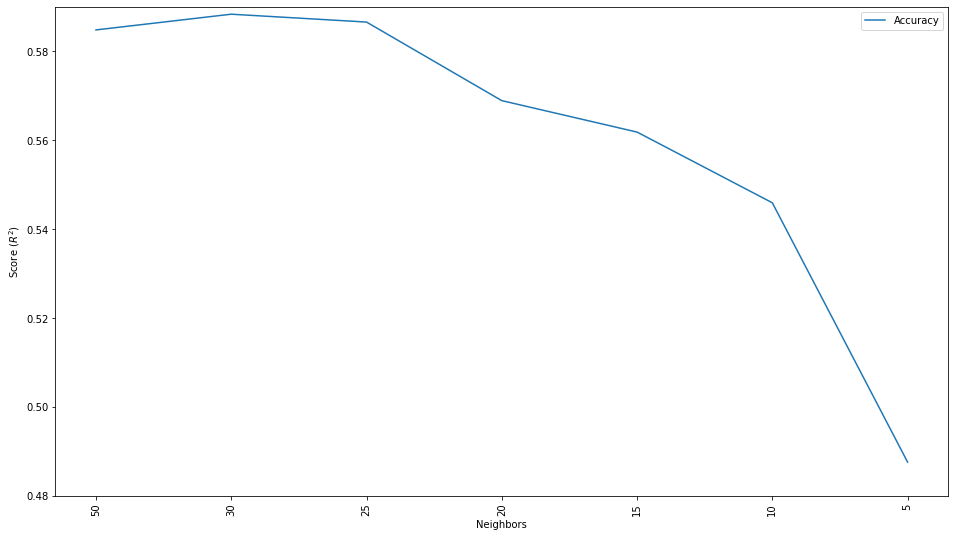

In [53]:
# Plot the new obtained score as a function of the chosen parameter
def plot_score():    
    plt.plot(accuracies, label="Accuracy")
    plt.ylabel("Score ($R^2$)")
    plt.xlabel("Neighbors")
    plt.ylim([0.48,0.59])
    plt.xticks(range(len(neighbors)), neighbors, rotation=90)
    plt.gca().invert_xaxis()
    plt.legend()

plot_score()